In [62]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

class first_opt:
    firstName='mohamed'
    def __init__(self,firstName):
       self.firstName=firstName
       
    def full_name(self):
        return self.firstName+'abdo'
    pass

fs_name=first_opt('karim')

print(fs_name.full_name())

print(dir(list))

In [63]:
import numpy as np

class FirstOrderOptimization:
    def __init__(self, alpha=1, momentum=.5, iterations=100, batch_size=15,cost_check=.001,grad_check=.001):
        self.alpha = alpha
        self.momentum = momentum
        self.iterations = iterations
        self.batch_size = batch_size
        self.theta = None
        self.velocity = None
        self.cost_check=cost_check
        self.grad_check=grad_check
        self.cost_list = []
        self.cost_list_batch = []
        self.theta_all = []
        self.theta_0 = []
        self.theta_1 = []
        self.theta_0_batch = []
        self.theta_1_batch = []
        self.hx = []
        self.gradient = None

    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        y = y.reshape(y.shape[0], 1)
        self.theta = np.zeros((X.shape[1], 1))
        self.velocity = np.zeros((X.shape[1], 1))
        m = y.shape[0]
        if self.batch_size <= 0:
            print("Batch size should be a positive integer. Setting batch size to 1.")
            self.batch_size = 1
        if self.batch_size > m:
            print("Batch size is larger than the number of observations. Setting batch size to the number of observations.")
            self.batch_size = m
        if 0.5 * m < self.batch_size < m:
            print("Batch size is greater than 50% of the number of observations. Setting batch size to 50% of the number of observations.")
            num_batches=2
        else :    
            num_batches = int(m / self.batch_size)
############################## number of batch
        for j in range(self.iterations):
            for i in range(num_batches):
                start_index = i * self.batch_size
                end_index = min((i + 1) * self.batch_size, m)
                X_batch = X[start_index:end_index]
                y_batch = y[start_index:end_index]
                h_x = np.dot(X_batch, self.theta)
                error = h_x - y_batch
                cost = np.mean(error ** 2) / 2
                self.gradient = (1 / len(y_batch)) * X_batch.T.dot(error)
                self.hx.append(np.dot(X, self.theta))
                self.cost_list.append(cost)
                self.velocity = self.momentum * self.velocity + self.alpha * self.gradient
                self.theta_all.append(self.theta.copy()) ##
                self.theta -= self.velocity
                
                #print(self.theta_all)
                self.theta_0.append(self.theta[0, 0])
                self.theta_1.append(self.theta[1, 0])
            self.theta_0_batch.append(self.theta[0, 0])
            self.theta_1_batch.append(self.theta[1, 0])
            self.cost_list_batch.append(cost)
            if np.linalg.norm(self.gradient) < self.grad_check:
                print('Reached small gradient')
                break
            if j != 0 and abs(self.cost_list_batch[-1] - self.cost_list_batch[-2]) < self.cost_check:
                print('Reached small cost')
                break

        return self

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return np.dot(X, self.theta)
#     def visual(self):
#         plt.plot(range(1, len(self.cost_list) + 1), self.cost_list, marker='o', linestyle='-')
#         plt.xlabel('Iterations')
#         plt.ylabel('Cost')
#         plt.title('Cost Function over Iterations')
#         plt.grid(True)
#         plt.show()


In [143]:
int(10/9)
gg=9
hh=10
if (hh/gg)>1

1

Reached small cost


0.9942649096877378

In [28]:
def mini_batch_momentum_gradient_descent_upgrade(X, y,alpha,momentum, iterations, batch_size):
    X=np.c_[np.ones((X.shape[0], 1)), X]
    y=y.reshape(y.shape[0], 1)
    # m = len(y)
    theta = np.zeros((X.shape[1], 1))
    velocity = np.zeros((X.shape[1], 1))
    m= y.shape[0]
    cost_list = []
    cost_list_batch = []
    theta_0 = []
    theta_1 = []
    theta_0_batch = []
    theta_1_batch = []
    hx=[]
    gradient = np.zeros((X.shape[1], 1))
   # cost=0
    num_batches = int(m/batch_size)
    for j in range(iterations):
        
        for i in range(num_batches):
            start_index = i * batch_size
            end_index = min((i + 1) * batch_size, m)
            X_batch = X[start_index:end_index]
            y_batch = y[start_index:end_index]
            h_x = np.dot(X_batch, theta)
            error= h_x - y_batch
           # error=theta.T.dot(X_batch.T) - y_batch
            #error = X_batch.dot(theta) - y_batch
            cost=np.mean(error**2)/2
           # cost=1/(batch_size*2)*(error**2)
            
            gradient = (1 /len(y_batch) ) * X_batch.T.dot(error)
            #gradient = (1 /batch_size ) * X_batch.T.dot(error)
            ypredict=X@theta
            hx.append(ypredict)
           # gradient = (1 / batch_size) * X_batch.T.dot(error)
            
            cost_list.append(cost)
            velocity = momentum * velocity + alpha * gradient 
            theta -= velocity
            theta_0.append(theta[0,0])
            theta_1.append(theta[1,0])
        theta_0_batch.append(theta[0,0])
        theta_1_batch.append(theta[1,0])   
        cost_list_batch.append(cost)
        if np.linalg.norm(gradient) < 0.001:
            print('reach to small gradient')
            break
        if j !=0 and abs(cost_list_batch[-1]-cost_list_batch[-2])<.001:
            print('reach to small cost')
            break         
       # if np.linalg.norm(gradient) < 0.2:
          #  print('small gradient')
          #  break
       # if cost<.1:
          #  print('small cost')
           # break
    
    return cost_list,error,theta,gradient,theta_0,theta_1,hx,cost_list_batch,theta_0_batch,theta_1_batch

In [67]:
import pandas as pd
import numpy as np
df=pd.read_csv('Dummy Data HSS.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [69]:
df = df.drop('Influencer', axis=1)
df = df.dropna()
test_df = df.sample(n=100)
df = df.iloc[:150]
df.head()

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1868 to 3624
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            100 non-null    float64
 1   Radio         100 non-null    float64
 2   Social Media  100 non-null    float64
 3   Sales         100 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [71]:
columns_to_normalize = df[['TV','Radio','Social Media']]
columns_to_normalize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 156
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            150 non-null    float64
 1   Radio         150 non-null    float64
 2   Social Media  150 non-null    float64
dtypes: float64(3)
memory usage: 4.7 KB


In [72]:
columns_to_normalize_test = test_df[['TV','Radio','Social Media']]
columns_to_normalize_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1868 to 3624
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            100 non-null    float64
 1   Radio         100 non-null    float64
 2   Social Media  100 non-null    float64
dtypes: float64(3)
memory usage: 3.1 KB


In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[columns_to_normalize.columns] = scaler.fit_transform(df[columns_to_normalize.columns])


In [74]:
test_df[columns_to_normalize_test.columns] = scaler.fit_transform(test_df[columns_to_normalize_test.columns])

test_df

,TV,Radio,Social Media,Sales
1868,0.011236,0.157391,0.233210,41.563415
1138,0.426966,0.368544,0.403691,175.962855
699,0.707865,0.574311,0.623287,265.522510
1685,0.438202,0.526525,0.331747,176.294088
4018,0.887640,0.756703,0.262302,316.371238
...,...,...,...,...
4561,0.550562,0.515804,0.599658,210.680016
1420,0.730337,0.577639,0.471873,266.413766
4444,0.303371,0.255662,0.096925,137.660563
1280,0.550562,0.288762,0.194715,214.191754


In [75]:
df

,TV,Radio,Social Media,Sales
0,0.066667,0.135208,0.290646,54.732757
1,0.033333,0.192183,0.240776,46.677897
2,0.344444,0.333976,0.291189,150.177829
3,0.811111,0.635396,0.692308,298.246340
4,0.055556,0.175114,0.140362,56.594181
...,...,...,...,...
152,0.155556,0.248670,0.155592,82.549072
153,0.344444,0.181039,0.017839,144.592087
154,0.633333,0.385548,0.489479,234.021177
155,0.455556,0.507158,0.415121,183.327735


In [76]:
np_data=df.values
np_test= test_df.values


In [77]:
np_test

array([[1.12359551e-02, 1.57391428e-01, 2.33209811e-01, 4.15634153e+01],
       [4.26966292e-01, 3.68543920e-01, 4.03690912e-01, 1.75962855e+02],
       [7.07865169e-01, 5.74311378e-01, 6.23286616e-01, 2.65522510e+02],
       [4.38202247e-01, 5.26525250e-01, 3.31747020e-01, 1.76294088e+02],
       [8.87640449e-01, 7.56703179e-01, 2.62302116e-01, 3.16371238e+02],
       [7.07865169e-01, 6.03712986e-01, 6.42972381e-01, 2.61966812e+02],
       [6.29213483e-01, 3.53364960e-01, 1.16026609e-01, 2.35795870e+02],
       [4.26966292e-01, 3.37362637e-01, 5.49933029e-01, 1.72890876e+02],
       [7.52808989e-01, 7.31075023e-01, 7.55408203e-01, 2.79665089e+02],
       [1.23595506e-01, 4.80472807e-01, 6.46682201e-01, 7.69616713e+01],
       [1.34831461e-01, 3.77414119e-01, 7.90837071e-01, 8.21457396e+01],
       [1.12359551e-01, 9.45430201e-02, 7.64085750e-03, 7.35143629e+01],
       [5.50561798e-01, 4.22362205e-01, 4.96256796e-01, 2.19154457e+02],
       [3.03370787e-01, 2.13761478e-01, 1.03602282e

In [78]:
X = np_data[:, :3]
X_test = np_test[:, :3]
#X

In [79]:
y = np_data[:, 3]  
y_test = np_test[:, 3]  
#y

In [17]:
X_test

array([[0.43373494, 0.4435605 , 0.30613716],
       [0.08433735, 0.2900902 , 0.15830436],
       [0.01204819, 0.03547019, 0.12251158],
       [0.54216867, 0.59069166, 0.33378563],
       [0.40963855, 0.44019334, 0.16430281],
       [0.01204819, 0.03157127, 0.09071448],
       [0.55421687, 0.69541364, 0.7060217 ],
       [0.51807229, 0.50769378, 0.39860384],
       [0.13253012, 0.11047672, 0.36872265],
       [0.77108434, 0.80181498, 0.66192048],
       [0.        , 0.21242849, 0.27757356],
       [0.40963855, 0.3814015 , 0.16485629],
       [0.86746988, 0.60972234, 0.18434787],
       [0.68674699, 0.50837259, 0.16771454],
       [0.46987952, 0.57138383, 0.67210725],
       [0.14457831, 0.31363231, 0.4005906 ],
       [0.07228916, 0.        , 0.20881703],
       [0.13253012, 0.30320261, 0.0548893 ],
       [0.59036145, 0.24202167, 0.14326757],
       [0.03614458, 0.12558798, 0.1556871 ],
       [0.65060241, 0.54787579, 0.47853679],
       [0.92771084, 0.79585913, 0.59082783],
       [0.

In [80]:
np_test

array([[1.12359551e-02, 1.57391428e-01, 2.33209811e-01, 4.15634153e+01],
       [4.26966292e-01, 3.68543920e-01, 4.03690912e-01, 1.75962855e+02],
       [7.07865169e-01, 5.74311378e-01, 6.23286616e-01, 2.65522510e+02],
       [4.38202247e-01, 5.26525250e-01, 3.31747020e-01, 1.76294088e+02],
       [8.87640449e-01, 7.56703179e-01, 2.62302116e-01, 3.16371238e+02],
       [7.07865169e-01, 6.03712986e-01, 6.42972381e-01, 2.61966812e+02],
       [6.29213483e-01, 3.53364960e-01, 1.16026609e-01, 2.35795870e+02],
       [4.26966292e-01, 3.37362637e-01, 5.49933029e-01, 1.72890876e+02],
       [7.52808989e-01, 7.31075023e-01, 7.55408203e-01, 2.79665089e+02],
       [1.23595506e-01, 4.80472807e-01, 6.46682201e-01, 7.69616713e+01],
       [1.34831461e-01, 3.77414119e-01, 7.90837071e-01, 8.21457396e+01],
       [1.12359551e-01, 9.45430201e-02, 7.64085750e-03, 7.35143629e+01],
       [5.50561798e-01, 4.22362205e-01, 4.96256796e-01, 2.19154457e+02],
       [3.03370787e-01, 2.13761478e-01, 1.03602282e

 # with minibatch 15  alph = 1
 # with stochasted  alpha = 1
 # with batch a;pha =1    iteration 100

# 1 

In [81]:

# (self, alpha=1, momentum=.5, iterations=100,
#batch_size=15,cost_check=.001,grad_check=.001)
 # First experiment  alpha=1 momentum zero  iteration 100 stochasted 
optimizer = FirstOrderOptimization(alpha=1, momentum=0, iterations=100, 
                                   batch_size=1,cost_check=.001,grad_check=.001)

# Fit the model to the training data
optimizer.fit(X, y)

# Make predictions on the test data
#predictions = optimizer.predict(X_test)
predictions = optimizer.predict(X)
from sklearn.metrics import r2_score
#y_new=X@theta
r2_score(y,predictions)

Reached small cost


0.9942649096877378

0.9942649096877378

In [ ]:
# def visual():
#     plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
# plt.xlabel('Iterations')
# plt.ylabel('Cost')
# plt.title('Cost Function over Iterations')
# plt.grid(True)
# plt.show()
# plt.figure(figsize=(8, 6))
# plt.plot(theta_1, cost_list, marker='o', linestyle='-')
# plt.title('Cost vs. Theta One')
# plt.xlabel('Theta One')
# plt.ylabel('Cost')
# plt.grid(True)
# plt.show()
# plt.figure(figsize=(8, 6))
# plt.plot(theta_0, cost_list, marker='o', linestyle='-')
# plt.title('Cost vs. Theta zero')
# plt.xlabel('Theta zero')
# plt.ylabel('Cost')
# plt.grid(True)
# plt.show()

In [82]:
def cost_vs_iteration(cost_list):
    plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function over Iterations')
    plt.grid(True)
    plt.show()
        
def cost_vs_parameter(theta_1,cost_list):
    plt.figure(figsize=(8, 6))
    plt.plot(theta_1, cost_list, marker='o', linestyle='-')
    plt.title('Cost vs. Theta One')
    plt.xlabel('Theta One')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()
    
    

In [21]:
#theta_all

In [83]:
def get_theta(theta_all):
    result_array = np.concatenate(theta_all, axis=1).T

    #print(result_array)
   # print("Shape:", result_array.shape)
    return result_array

In [84]:
thetaa=get_theta(optimizer.theta_all) 
thetaa

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [ 54.73275715,   3.64885048,   7.40031323,  15.90787896],
       [ 41.30381505,   3.20121907,   4.81950355,  12.67450667],
       ...,
       [ 37.75209344, 313.94887824,  -5.62661691, -13.6271008 ],
       [ 44.02639228, 317.92260084,  -3.20757599, -10.5559649 ],
       [ 44.50508056, 318.14066994,  -2.96480564, -10.35725119]])

In [85]:
optimizer.theta

array([[ 45.8953516 ],
       [319.53094099],
       [ -1.88236194],
       [ -9.3339093 ]])

In [86]:
thetaa=get_theta(optimizer.theta_all) 
thetaa

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [ 54.73275715,   3.64885048,   7.40031323,  15.90787896],
       [ 41.30381505,   3.20121907,   4.81950355,  12.67450667],
       ...,
       [ 37.75209344, 313.94887824,  -5.62661691, -13.6271008 ],
       [ 44.02639228, 317.92260084,  -3.20757599, -10.5559649 ],
       [ 44.50508056, 318.14066994,  -2.96480564, -10.35725119]])

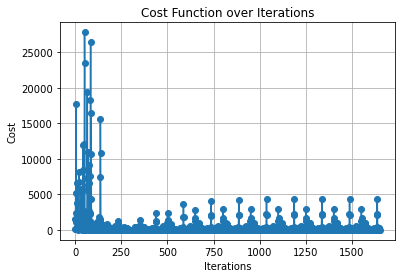

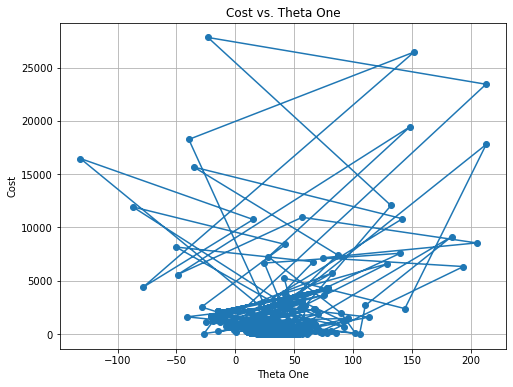

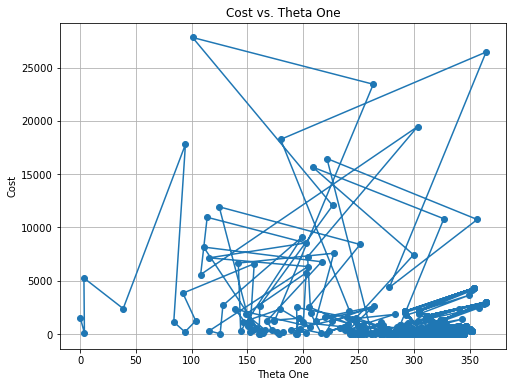

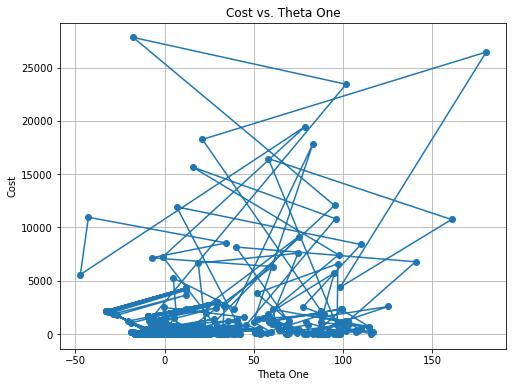

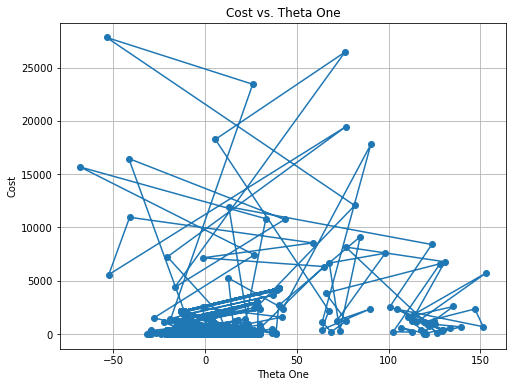

In [87]:
# = array[:, 0]
cost_vs_iteration(optimizer.cost_list)
cost_vs_parameter(thetaa[:, 0],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 1],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 2],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 3],optimizer.cost_list)  

# 2

In [28]:

# (self, alpha=1, momentum=.5, iterations=100,
#batch_size=15,cost_check=.001,grad_check=.001)
 # First experiment  alpha=1 momentum zero  iteration 100 stochasted 
optimizer = FirstOrderOptimization(alpha=1, momentum=0, iterations=100, 
                                   batch_size=15,cost_check=.001,grad_check=.001)

# Fit the model to the training data
optimizer.fit(X, y)

# Make predictions on the test data
#predictions = optimizer.predict(X_test)
predictions = optimizer.predict(X_test)
from sklearn.metrics import r2_score
#y_new=X@theta
r2_score(y_test,predictions)

Reached small cost


0.9908658988356513

In [29]:
thetaa=get_theta(optimizer.theta_all) 


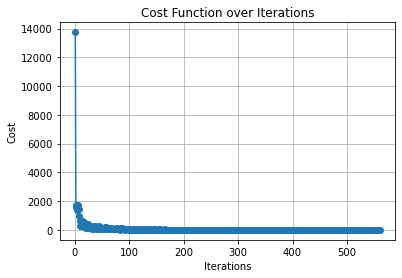

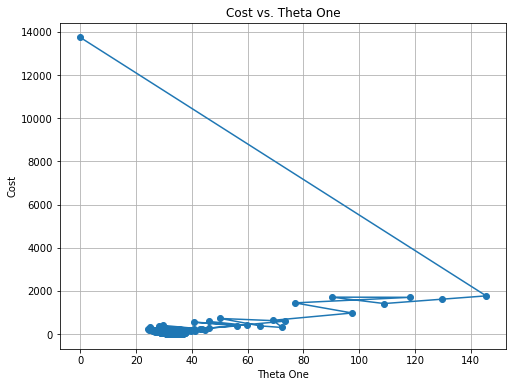

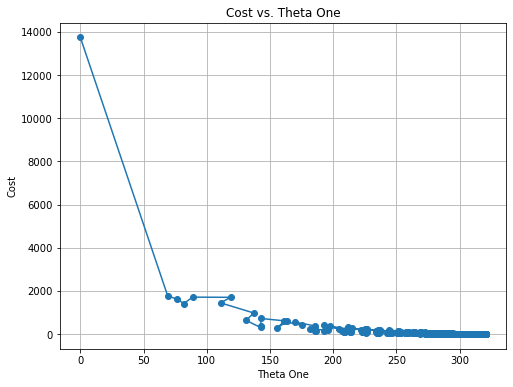

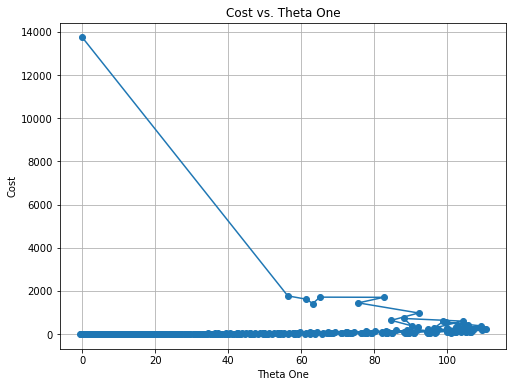

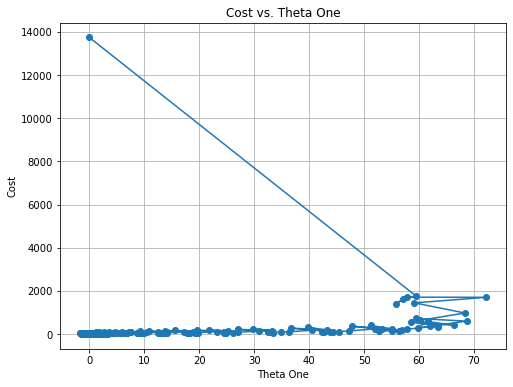

In [30]:
# = array[:, 0]
cost_vs_iteration(optimizer.cost_list)
cost_vs_parameter(thetaa[:, 0],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 1],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 2],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 3],optimizer.cost_list)  

# 3

In [31]:

# (self, alpha=1, momentum=.5, iterations=100,
#batch_size=15,cost_check=.001,grad_check=.001)
 # First experiment  alpha=1 momentum zero  iteration 100 stochasted 
optimizer = FirstOrderOptimization(alpha=.9, momentum=0, iterations=100, 
                                   batch_size=150,cost_check=.001,grad_check=.001)

# Fit the model to the training data
optimizer.fit(X, y)

# Make predictions on the test data
#predictions = optimizer.predict(X_test)
predictions = optimizer.predict(X)
from sklearn.metrics import r2_score
#y_new=X@theta
r2_score(y,predictions)

0.9919669659616336

In [32]:
thetaa=get_theta(optimizer.theta_all) 


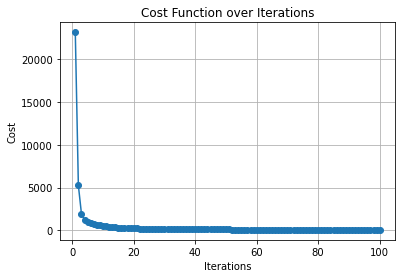

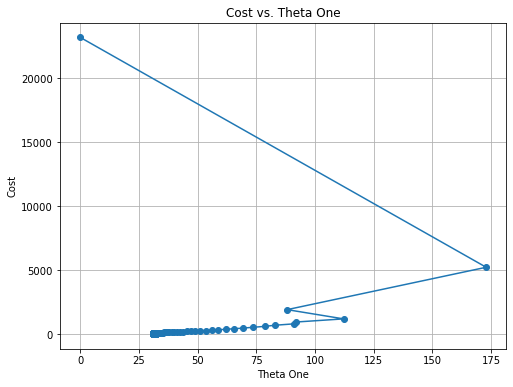

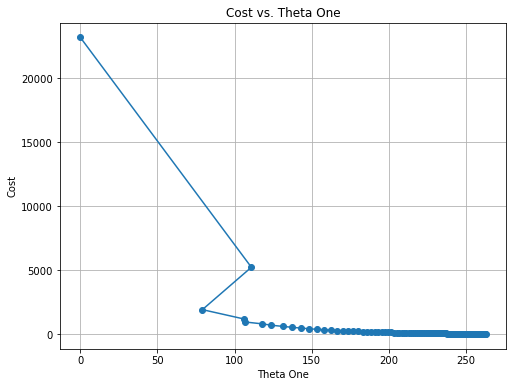

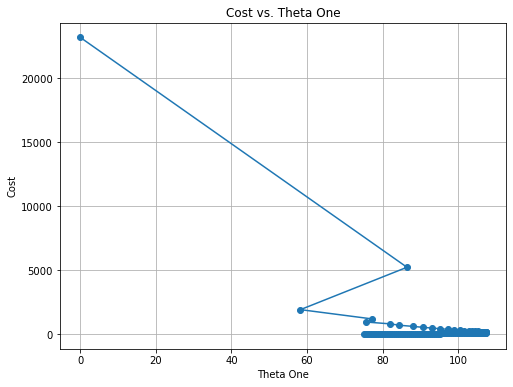

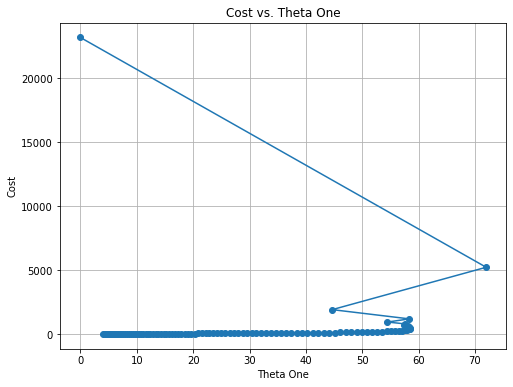

In [33]:
# = array[:, 0]
cost_vs_iteration(optimizer.cost_list)
cost_vs_parameter(thetaa[:, 0],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 1],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 2],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 3],optimizer.cost_list)  

# 4

In [34]:
# (self, alpha=1, momentum=.5, iterations=100,
#batch_size=15,cost_check=.001,grad_check=.001)
 # First experiment  alpha=1 momentum zero  iteration 100 stochasted 
optimizer = FirstOrderOptimization(alpha=1, momentum=0, iterations=1000, 
                                   batch_size=50,cost_check=.001,grad_check=.001)

# Fit the model to the training data
optimizer.fit(X, y)

# Make predictions on the test data
#predictions = optimizer.predict(X_test)
predictions = optimizer.predict(X)
from sklearn.metrics import r2_score
#y_new=X@theta
r2_score(y,predictions)

Reached small cost


0.9991508479834568

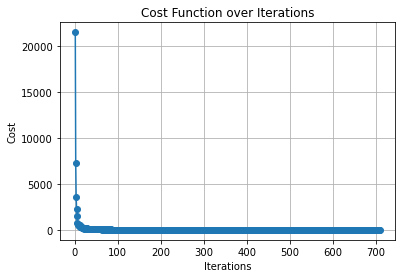

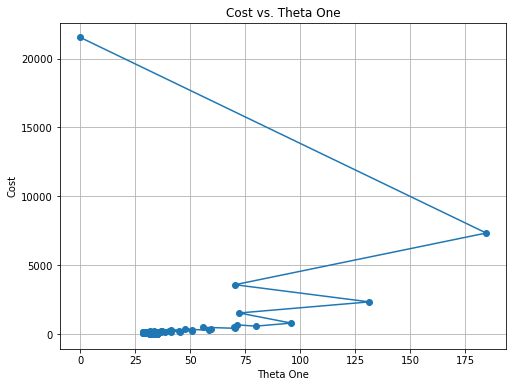

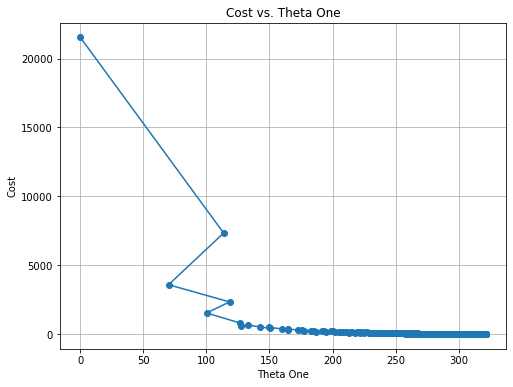

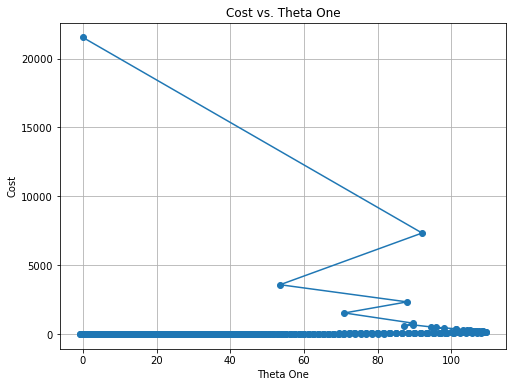

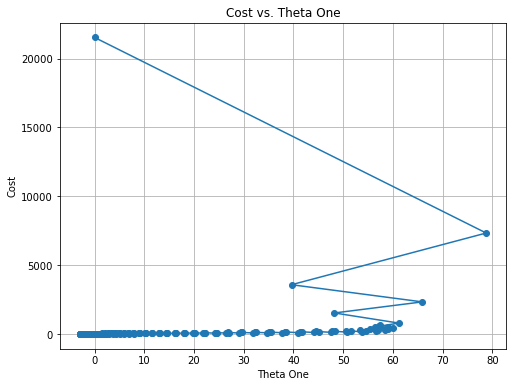

In [35]:
thetaa=get_theta(optimizer.theta_all)
# = array[:, 0]
cost_vs_iteration(optimizer.cost_list)
cost_vs_parameter(thetaa[:, 0],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 1],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 2],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 3],optimizer.cost_list)

In [36]:
# (self, alpha=1, momentum=.5, iterations=100,
#batch_size=15,cost_check=.001,grad_check=.001)
 # First experiment  alpha=1 momentum zero  iteration 100 stochasted 
optimizer = FirstOrderOptimization(alpha=0.01, momentum=0, iterations=10000, 
                                   batch_size=150,cost_check=.001,grad_check=.001)

# Fit the model to the training data
optimizer.fit(X, y)

# Make predictions on the test data
#predictions = optimizer.predict(X_test)
predictions = optimizer.predict(X_test)


In [37]:
from sklearn.metrics import r2_score
#y_new=X@theta
r2_score(y_test,predictions)

0.9811836367354697

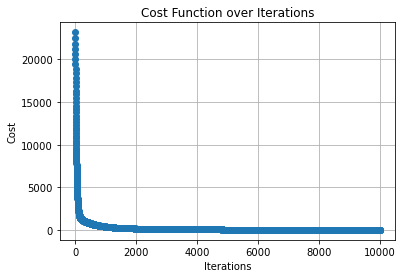

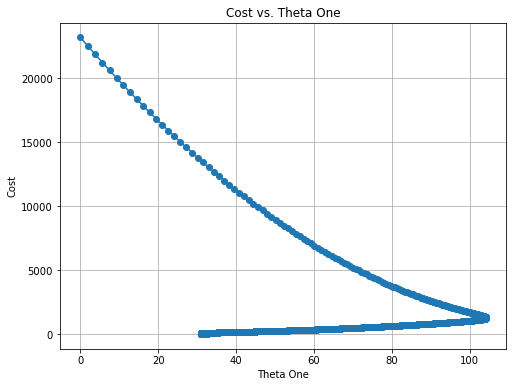

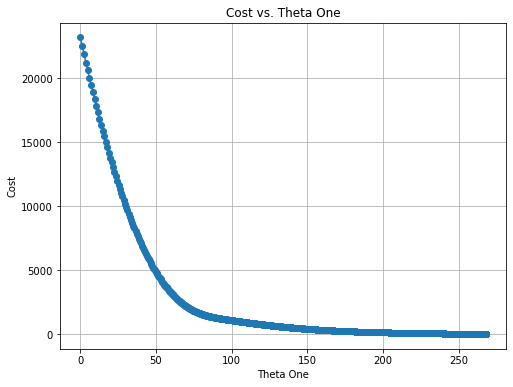

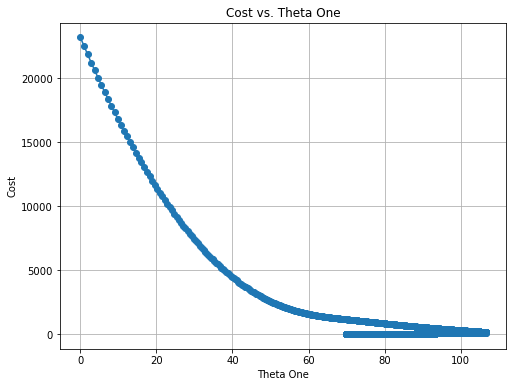

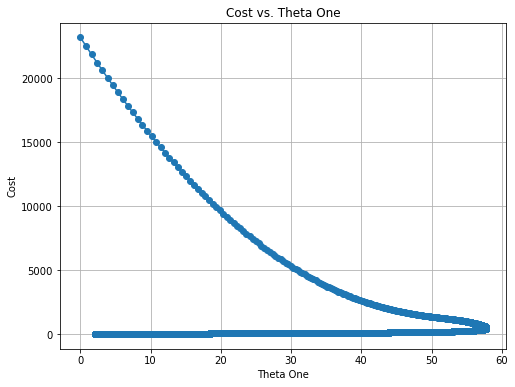

In [38]:
thetaa=get_theta(optimizer.theta_all)
# = array[:, 0]
cost_vs_iteration(optimizer.cost_list)
cost_vs_parameter(thetaa[:, 0],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 1],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 2],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 3],optimizer.cost_list)

In [39]:
optimizer.gradient

array([[-0.02505261],
       [-0.46280499],
       [ 0.47362679],
       [ 0.18286497]])

In [40]:
gradient_norm = np.linalg.norm(optimizer.gradient)

print("Norm of the gradient vector:", gradient_norm)

Norm of the gradient vector: 0.6874431041615564


In [41]:
optimizer.cost_list[-1]

32.795039792211064

In [42]:
optimizer.cost_list[-2]

32.799766285647856

#  with momentum

In [43]:

# (self, alpha=1, momentum=.5, iterations=100,
#batch_size=15,cost_check=.001,grad_check=.001)
 # First experiment  alpha=1 momentum zero  iteration 100 stochasted 
optimizer = FirstOrderOptimization(alpha=0.01, momentum=0.9, iterations=10000, 
                                   batch_size=150,cost_check=.001,grad_check=.001)

# Fit the model to the training data
optimizer.fit(X, y)

# Make predictions on the test data
#predictions = optimizer.predict(X_test)

predictions = optimizer.predict(X)
from sklearn.metrics import r2_score
#y_new=X@theta
r2_score(y,predictions)

Reached small cost


0.9990800999095832

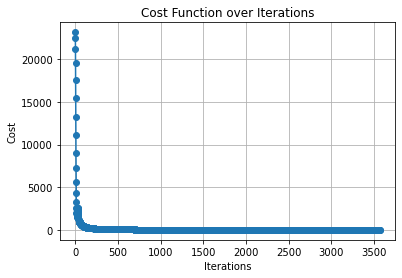

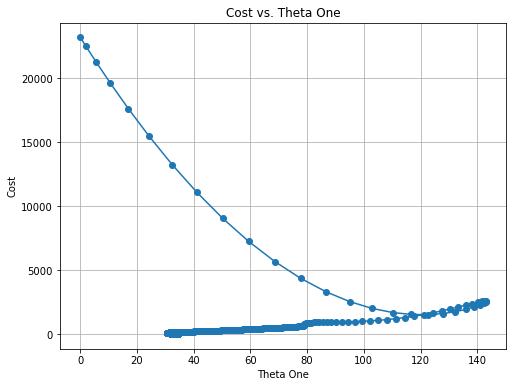

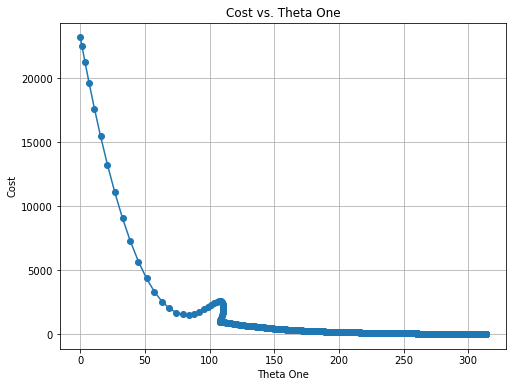

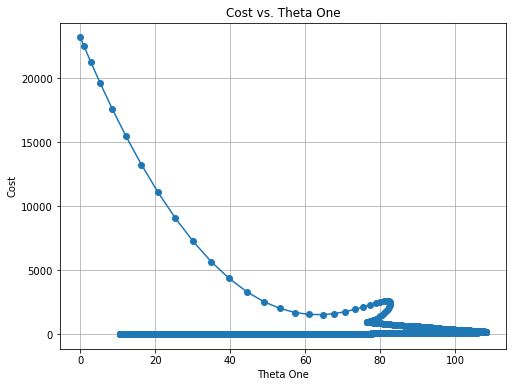

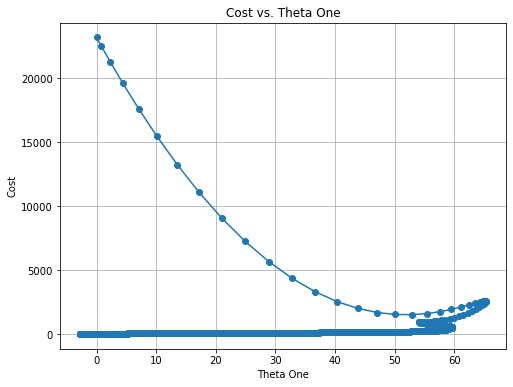

In [44]:
thetaa=get_theta(optimizer.theta_all)
# = array[:, 0]
cost_vs_iteration(optimizer.cost_list)
cost_vs_parameter(thetaa[:, 0],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 1],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 2],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 3],optimizer.cost_list)  

In [45]:
print(len(optimizer.cost_list_batch))

3568


In [46]:

# (self, alpha=1, momentum=.5, iterations=100,
#batch_size=15,cost_check=.001,grad_check=.001)
 # First experiment  alpha=1 momentum zero  iteration 100 stochasted 
optimizer = FirstOrderOptimization(alpha=0.1, momentum=0.9, iterations=10000, 
                                   batch_size=15,cost_check=.001,grad_check=.001)

# Fit the model to the training data
optimizer.fit(X, y)

# Make predictions on the test data
#predictions = optimizer.predict(X_test)

predictions = optimizer.predict(X)
from sklearn.metrics import r2_score
#y_new=X@theta
r2_score(y,predictions)

Reached small cost


0.9992174802804304

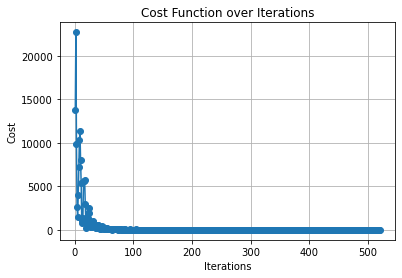

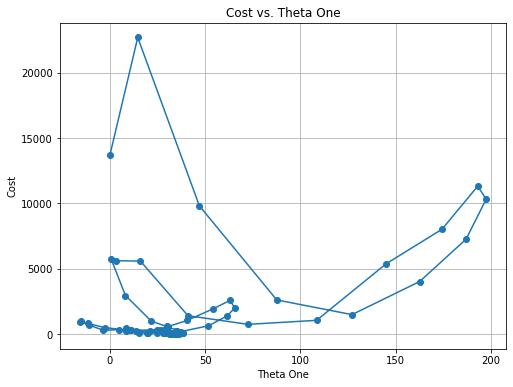

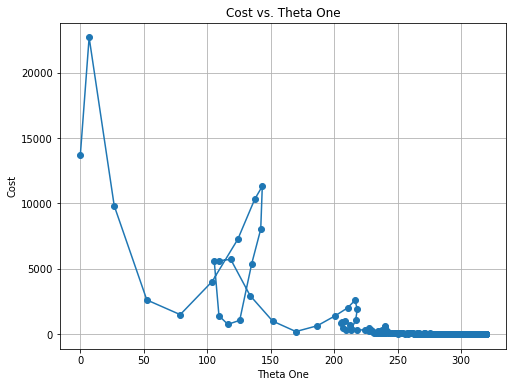

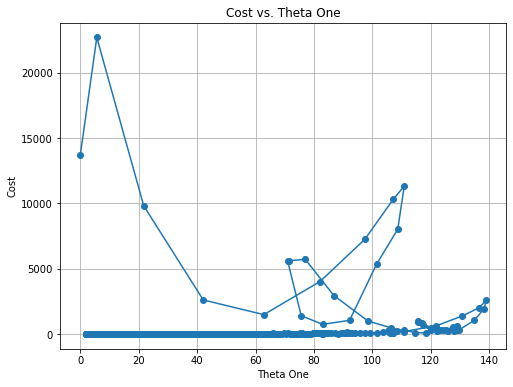

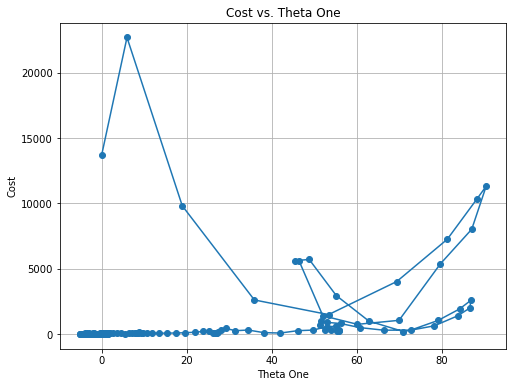

In [47]:
thetaa=get_theta(optimizer.theta_all)
# = array[:, 0]
cost_vs_iteration(optimizer.cost_list)
cost_vs_parameter(thetaa[:, 0],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 1],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 2],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 3],optimizer.cost_list)  

In [48]:
# (self, alpha=1, momentum=.5, iterations=100,
#batch_size=15,cost_check=.001,grad_check=.001)
 # First experiment  alpha=1 momentum zero  iteration 100 stochasted 
optimizer = FirstOrderOptimization(alpha=0.1, momentum=0.9, iterations=10000, 
                                   batch_size=1,cost_check=.001,grad_check=.001)

# Fit the model to the training data
optimizer.fit(X, y)

# Make predictions on the test data
#predictions = optimizer.predict(X_test)

predictions = optimizer.predict(X)
from sklearn.metrics import r2_score
#y_new=X@theta
r2_score(y,predictions)

Reached small cost


0.9975414159370798

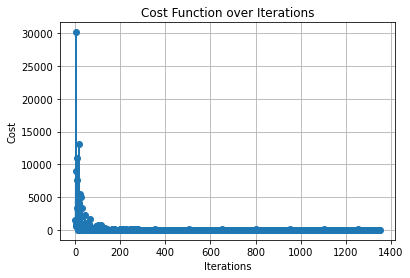

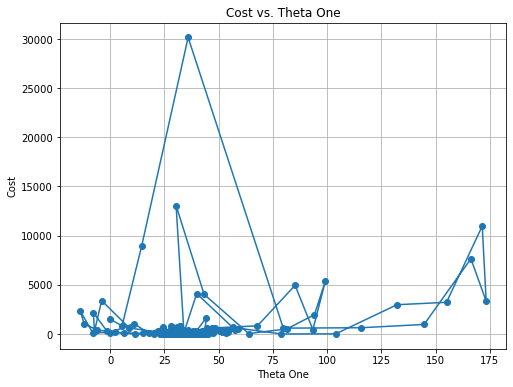

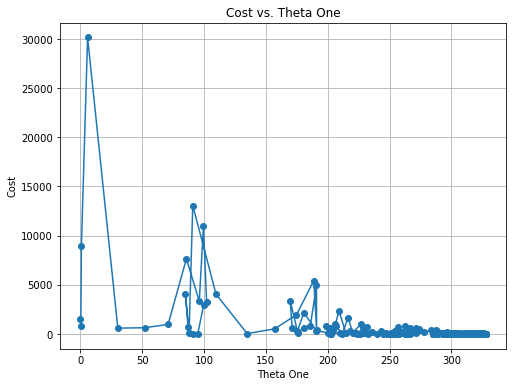

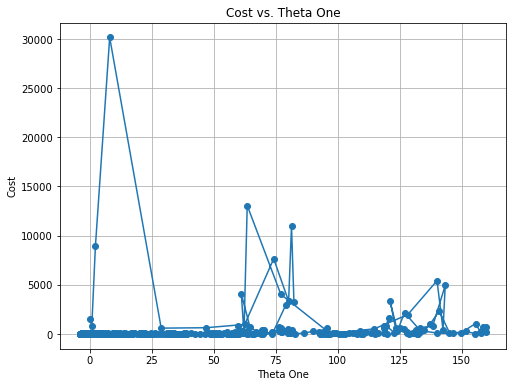

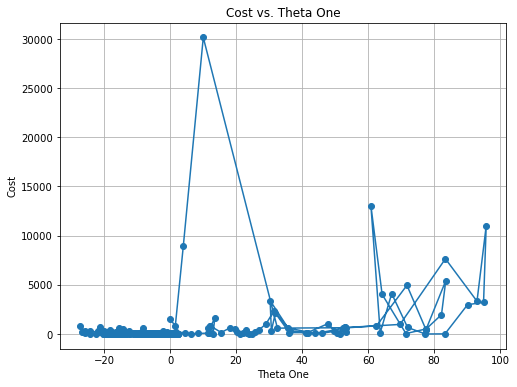

In [49]:
thetaa=get_theta(optimizer.theta_all)
# = array[:, 0]
cost_vs_iteration(optimizer.cost_list)
cost_vs_parameter(thetaa[:, 0],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 1],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 2],optimizer.cost_list)  
cost_vs_parameter(thetaa[:, 3],optimizer.cost_list)  

In [88]:
import numpy as np

class Second_order_optimizer:
    def __init__(self, alpha=0.01, iterations=100, cost_check=0.001, grad_check=0.001):
        self.alpha = alpha
        self.iterations = iterations
        self.cost_check = cost_check
        self.grad_check = grad_check
        self.theta_2 = None
        self.theta_1 = None
        self.cost_list = []
        self.theta_all = []

    def fit(self, X, y_actual):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        y_actual = y_actual.reshape(y_actual.shape[0], 1)
        self.theta_2 = np.full((X.shape[1], 1), 0.1)
        self.theta_1 = np.full((X.shape[1], 1), 0.2)
        m = y_actual.shape[0]

        j = np.identity(X.shape[1])
        b_1 = np.identity(X.shape[1])
        self.theta_all.insert(0,self.theta_1.copy())
        for i in range(self.iterations):
            h_x = np.dot(X, self.theta_1)
            error = h_x - y_actual
            cost = np.mean(error ** 2) / 2
            self.cost_list.append(cost)

            gradient1 = (1 / m) * X.T.dot(np.dot(X, self.theta_1) - y_actual)
            gradient2 = (1 / m) * X.T.dot(np.dot(X, self.theta_2) - y_actual)
            delta_X = self.theta_2 - self.theta_1
            y = gradient2 - gradient1

            first_brackets = j - np.divide(np.dot(delta_X, y.T), np.dot(y.T, delta_X))
            first_Dot_B = np.dot(first_brackets, b_1)
            second_brackets = j - np.divide(np.dot(y, delta_X.T), np.dot(y.T, delta_X))
            third = np.divide(np.dot(delta_X, delta_X.T), np.dot(y.T, delta_X))
            b_1 = np.dot(first_Dot_B, second_brackets) + third

            if np.linalg.norm(gradient1) <= self.grad_check:
                print('Reached small gradient')
                break
            if i != 0 and abs(self.cost_list[-1] - self.cost_list[-2]) < self.cost_check:
                print('Reached small cost')
                break

            self.theta_2 = self.theta_1.copy()
            self.theta_1 -= self.alpha * np.dot(b_1, gradient1)
            self.theta_all.append(self.theta_1.copy())

        return self.theta_1, i, self.cost_list, self.theta_all

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return np.dot(X, self.theta_1)




In [89]:
model = Second_order_optimizer(alpha=1, iterations=100, cost_check=0.001, grad_check=0.001)

# Fit the model to the data
theta, iterations, cost_list, theta_all = model.fit(X, y)

# Make predictions
predictions = model.predict(X)
r2_score(y,predictions)

Reached small gradient


0.999228131628416

In [90]:
r2_score(y,predictions)

0.999228131628416

In [91]:
model.cost_list

[23063.898258883728,
 872.2650001469873,
 761.378204330018,
 292.21286762976865,
 280.3832393324934,
 70.30057670185104,
 57.08830470171859,
 54.8857884163333,
 53.5772703028247,
 47.679190358489336,
 37.73928424601375,
 21.42132227430808,
 8.501171671213998,
 4.111374305771937,
 3.645502060598636,
 3.6307418710683095,
 3.630618883963713]

In [92]:
model.cost_list

[23063.898258883728,
 872.2650001469873,
 761.378204330018,
 292.21286762976865,
 280.3832393324934,
 70.30057670185104,
 57.08830470171859,
 54.8857884163333,
 53.5772703028247,
 47.679190358489336,
 37.73928424601375,
 21.42132227430808,
 8.501171671213998,
 4.111374305771937,
 3.645502060598636,
 3.6307418710683095,
 3.630618883963713]

In [93]:
thetaa=get_theta(model.theta_all)
thetaa

array([[ 2.00000000e-01,  2.00000000e-01,  2.00000000e-01,
         2.00000000e-01],
       [ 8.26861412e+01,  9.90589488e+01,  9.46770417e+01,
         9.08144130e+01],
       [ 7.62956882e+01,  1.07446507e+02,  9.88562514e+01,
         9.13154026e+01],
       [ 1.88680987e+01,  1.80212654e+02,  1.32206685e+02,
         9.05380607e+01],
       [ 1.84001009e+01,  1.83204053e+02,  1.31786720e+02,
         8.75207192e+01],
       [ 2.34001126e+01,  2.58396654e+02,  1.08030450e+02,
        -8.99122469e+00],
       [ 3.05311225e+01,  2.64435619e+02,  1.00445762e+02,
        -2.43428372e+01],
       [ 3.38023274e+01,  2.63842350e+02,  9.72246732e+01,
        -2.65740295e+01],
       [ 3.50069211e+01,  2.63836244e+02,  9.50738724e+01,
        -2.65602139e+01],
       [ 3.84499627e+01,  2.66258028e+02,  8.46388490e+01,
        -2.50854728e+01],
       [ 4.16424431e+01,  2.74036230e+02,  6.56543990e+01,
        -2.09624545e+01],
       [ 4.33468925e+01,  2.92560947e+02,  3.14106772e+01,
      

In [94]:
print(len(model.cost_list))
print(len(thetaa[:, 0]))

17
17


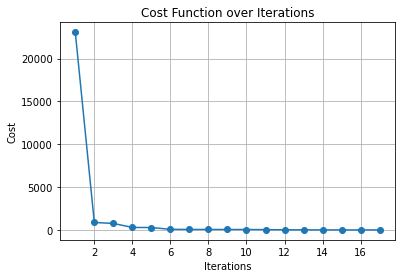

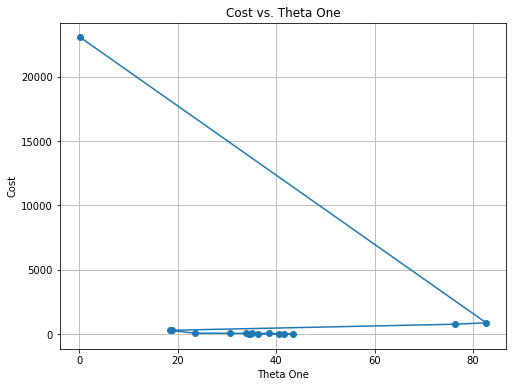

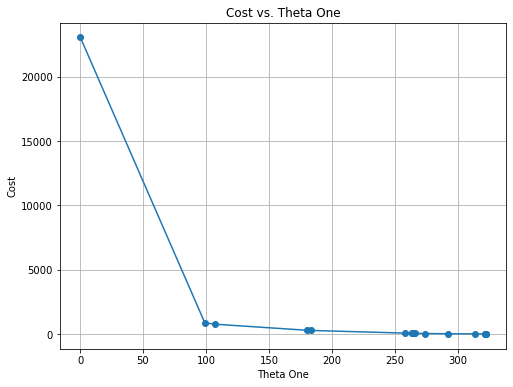

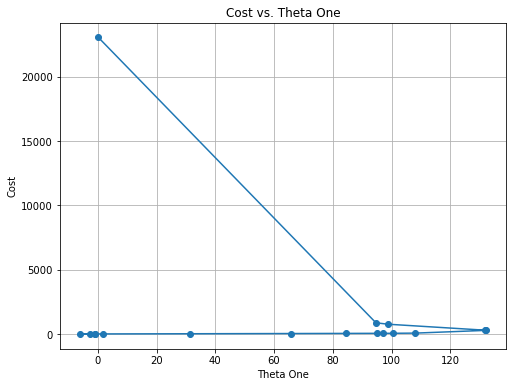

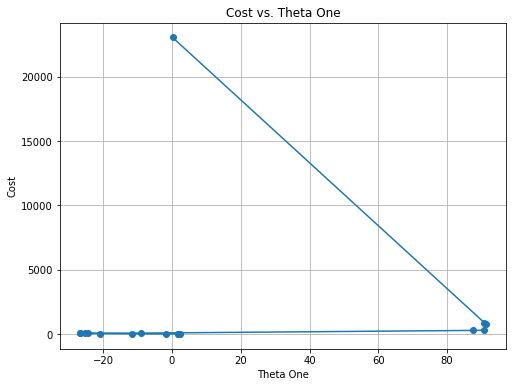

In [57]:

thetaa=get_theta(model.theta_all)
# = array[:, 0]
cost_vs_iteration(model.cost_list)
cost_vs_parameter(thetaa[:, 0],model.cost_list)  
cost_vs_parameter(thetaa[:, 1],model.cost_list)  
cost_vs_parameter(thetaa[:, 2],model.cost_list)  
cost_vs_parameter(thetaa[:, 3],model.cost_list) 

In [95]:
model = Second_order_optimizer(alpha=.5, iterations=1000, cost_check=0.001, grad_check=0.001)

# Fit the model to the data
theta, iterations, cost_list, theta_all = model.fit(X, y)

# Make predictions
predictions = model.predict(X)
r2_score(y,predictions)

Reached small cost


0.9992281133393323

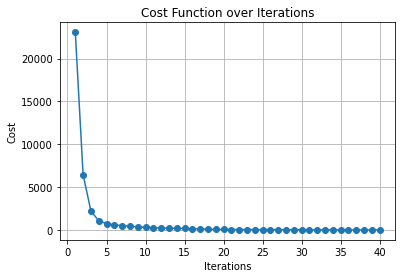

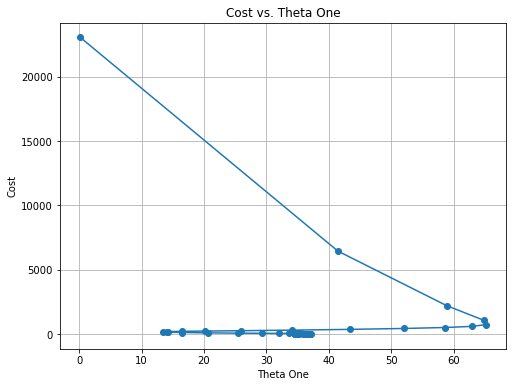

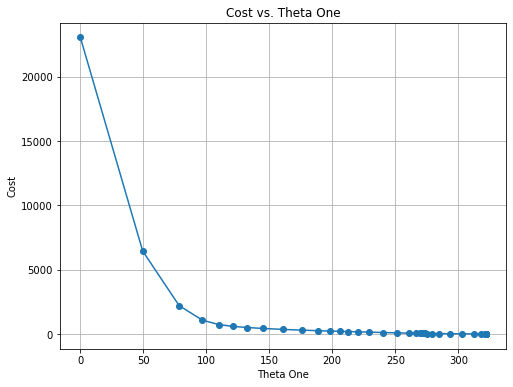

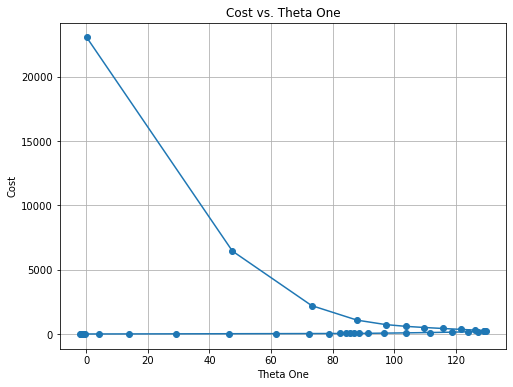

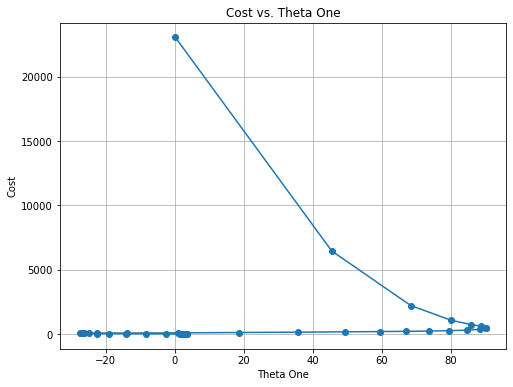

In [59]:

thetaa=get_theta(model.theta_all)
# = array[:, 0]
cost_vs_iteration(model.cost_list)
cost_vs_parameter(thetaa[:, 0],model.cost_list)  
cost_vs_parameter(thetaa[:, 1],model.cost_list)  
cost_vs_parameter(thetaa[:, 2],model.cost_list)  
cost_vs_parameter(thetaa[:, 3],model.cost_list) 

In [60]:
model = Second_order_optimizer(alpha=.1, iterations=10000, cost_check=0.001, grad_check=0.001)

# Fit the model to the data
theta, iterations, cost_list, theta_all = model.fit(X, y)

# Make predictions
predictions = model.predict(X)
r2_score(y,predictions)

Reached small cost


0.999227302399366

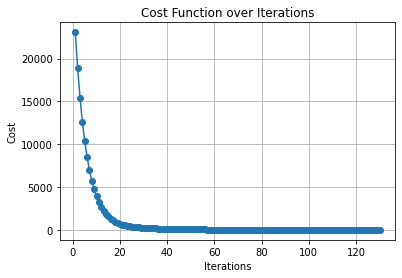

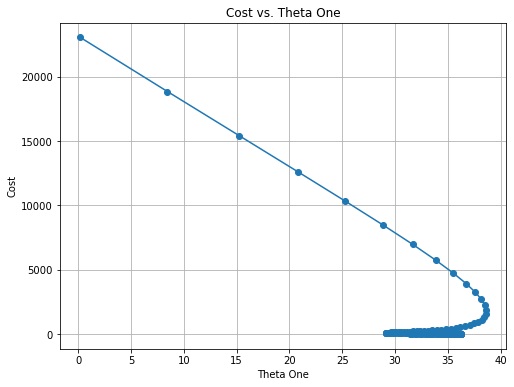

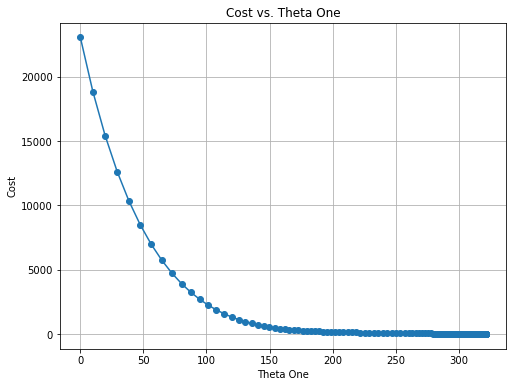

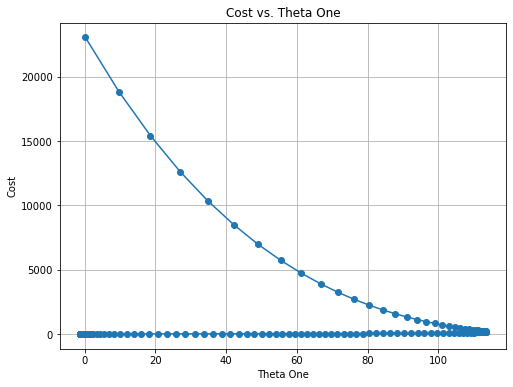

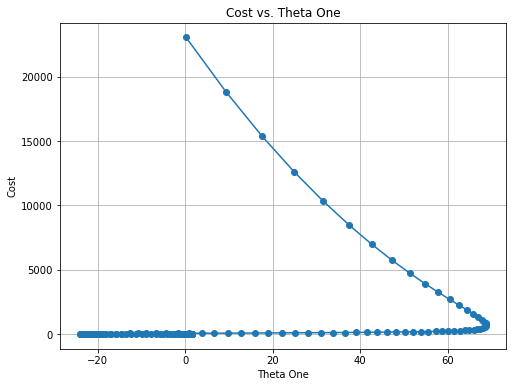

In [61]:

thetaa=get_theta(model.theta_all)
# = array[:, 0]
cost_vs_iteration(model.cost_list)
cost_vs_parameter(thetaa[:, 0],model.cost_list)  
cost_vs_parameter(thetaa[:, 1],model.cost_list)  
cost_vs_parameter(thetaa[:, 2],model.cost_list)  
cost_vs_parameter(thetaa[:, 3],model.cost_list) 